In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from IPython.core import display as ICD
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
Survey = pd.read_csv('survey.csv')
display(Survey.columns)
display(Survey.head(5))
print(Survey.shape)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


(1259, 27)


In [3]:
#Make a copy of the data set and look at basic statistics
display(Survey.describe())

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [4]:
#Convert timestamp to datetime object for further analysis
Survey['Timestamp'] = pd.to_datetime(Survey['Timestamp'], infer_datetime_format=True)
#check data types of each column
display(Survey.dtypes)
#check null values
null = pd.DataFrame(Survey.isnull().sum())
print('\nCount of Null Data Points:')
display(null)
#store original shape
OrigSize = Survey.shape

Timestamp                    datetime64[ns]
Age                          int64         
Gender                       object        
Country                      object        
state                        object        
self_employed                object        
family_history               object        
treatment                    object        
work_interfere               object        
no_employees                 object        
remote_work                  object        
tech_company                 object        
benefits                     object        
care_options                 object        
wellness_program             object        
seek_help                    object        
anonymity                    object        
leave                        object        
mental_health_consequence    object        
phys_health_consequence      object        
coworkers                    object        
supervisor                   object        
mental_health_interview      obj


Count of Null Data Points:


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [5]:
#Drop ages above 99 and below 0
Survey = Survey[(Survey['Age'] < 99) & (Survey['Age'] > 0)]

#Drop self employed catagory because its a No or NA for a large majority
#Drop comments since most are NA
Survey = Survey[['Age','Gender','Country','state',
                 'family_history','treatment','work_interfere',
                 'no_employees','remote_work','tech_company',
                 'benefits','care_options','wellness_program',
                 'seek_help','anonymity','leave',
                 'mental_health_consequence','phys_health_consequence',
                 'coworkers','supervisor','mental_health_interview',
                 'phys_health_interview','mental_vs_physical','obs_consequence']]

#Fill Nan in state with notUS for logical test
Survey['state'].fillna('notUS', inplace=True)

#Drop notUS state values where country = USA
Survey = Survey.drop(Survey[(Survey.Country == 'United States') & (Survey.state == 'notUS')].index)

#Fill Nan in work_interfere with unknown
Survey['work_interfere'].fillna('unknown', inplace=True)

NewSize = Survey.shape
print('Original size: {}\nNew size     : {}'.format(OrigSize,NewSize))

Original size: (1259, 27)
New size     : (1243, 24)


In [6]:
#Recheck all Nan values are taken care of
null = pd.DataFrame(Survey.isnull().sum())
print('\nCount of Null Data Points:')
display(null)


Count of Null Data Points:


,0
Age,0
Gender,0
Country,0
state,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0


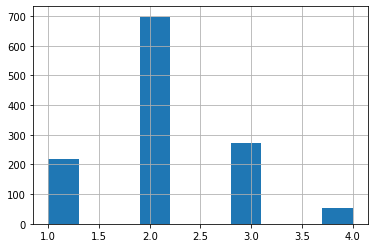

In [7]:
#stratify age into 4 catagories (0-25, 25-35, 35-45, 45+)
Survey['Age'] = pd.cut(Survey['Age'],
                       bins=[0.,25.,35.,45.,np.inf],
                       labels=[1,2,3,4])
Survey['Age'].hist()

In [8]:
# Create M and F catagories
Survey.loc[Survey['Gender'].str.contains('female', case=False), 'Gender'] = 'F'
Survey.loc[Survey['Gender'].str.contains('male', case=False), 'Gender'] = 'M'
Survey.loc[Survey['Gender'].str.contains('f', case=False), 'Gender'] = 'F'
Survey.loc[Survey['Gender'].str.contains('m', case=False), 'Gender'] = 'M'

# get rid of anything that isn't M or F
Survey = Survey[(Survey['Gender'] == 'M') | (Survey['Gender'] == 'F')]

#check what was dropped
print('Previous Size: {}\nNew Size     : {}'.format(NewSize,Survey.shape))
#Survey.head(500)

Previous Size: (1243, 24)
New Size     : (1232, 24)


In [9]:
#Encode all ordinal fields (Everything but state and country)
#I'm sure there is a better way but I'm committed now
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

cat_names = {}
#Gender encoding 0 = F, 1 = M
Survey[['Gender']] = ordinal_encoder.fit_transform(Survey[['Gender']])
cat_names['Gender'] = ordinal_encoder.categories_

#Family history encoding 0 = No, 1 = Yes
Survey[['family_history']] = ordinal_encoder.fit_transform(Survey[['family_history']])
cat_names['family_history'] = ordinal_encoder.categories_

#Treatment encoding 0 = No, 1 = Yes
Survey[['treatment']] = ordinal_encoder.fit_transform(Survey[['treatment']])
cat_names['treatment'] = ordinal_encoder.categories_

#Work interference encoding 0 = Never, Rarely = 1, unknown = 2, 
# Sometimes = 3, Often = 4
work_encoder = OrdinalEncoder(categories=[['Never','Rarely','unknown','Sometimes','Often']])
Survey[['work_interfere']] = work_encoder.fit_transform(Survey[['work_interfere']])
cat_names['work_interfere'] = work_encoder.categories_

#Number employes encoding 0 = 1-5, 1 = 6-25, 2 = 26-100, 
# 3 = 100-500, 4 = 500-1000, 5 = More than 1000
no_emp_encoder = OrdinalEncoder(categories=[['1-5','6-25','26-100','100-500','500-1000','More than 1000']])
Survey[['no_employees']] = no_emp_encoder.fit_transform(Survey[['no_employees']])
cat_names['no_employees'] = no_emp_encoder.categories_

#Remote Work encoding 0 = No, 1 = Yes
Survey[['remote_work']] = ordinal_encoder.fit_transform(Survey[['remote_work']])
cat_names['remote_work'] = ordinal_encoder.categories_

#Tech Company encoding 0 = No, 1 = Yes
Survey[['tech_company']] = ordinal_encoder.fit_transform(Survey[['tech_company']])
cat_names['tech_company'] = ordinal_encoder.categories_

#Benefits encoding 0 = No, 1 = Don't Know, 2 = Yes
benefits_encoder = OrdinalEncoder(categories=[['No',"Don't know",'Yes']])
Survey[['benefits']] = benefits_encoder.fit_transform(Survey[['benefits']])
cat_names['benefits'] = benefits_encoder.categories_

#Care Options encoding 0 = No, 1 = Not sure, 2 = Yes
care_encoder = OrdinalEncoder(categories=[['No',"Not sure",'Yes']])
Survey[['care_options']] = care_encoder.fit_transform(Survey[['care_options']])
cat_names['care_options'] = care_encoder.categories_

#Wellness program encoding 0 = No, 1 = Don't Know, 2 = Yes
well_encoder = OrdinalEncoder(categories=[['No',"Don't know",'Yes']])
Survey[['wellness_program']] = well_encoder.fit_transform(Survey[['wellness_program']])
cat_names['wellness_program'] = well_encoder.categories_

#Seek help encoding 0 = No, 1 = Don't Know, 2 = Yes
seek_encoder = OrdinalEncoder(categories=[['No',"Don't know",'Yes']])
Survey[['seek_help']] = seek_encoder.fit_transform(Survey[['seek_help']])
cat_names['seek_help'] = seek_encoder.categories_

#Anonymity encoding 0 = No, 1 = Don't Know, 2 = Yes
anon_encoder = OrdinalEncoder(categories=[['No',"Don't know",'Yes']])
Survey[['anonymity']] = anon_encoder.fit_transform(Survey[['anonymity']])
cat_names['anonymity'] = anon_encoder.categories_

#Leave encoding 0=Very difficult, 1=Somewhat difficult, 
# 2=Don't know, 3=Somewhat easy, 4=Very easy
leave_encoder = OrdinalEncoder(categories=[['Very difficult','Somewhat difficult',"Don't know",'Somewhat easy','Very easy']])
Survey[['leave']] = leave_encoder.fit_transform(Survey[['leave']])
cat_names['leave'] = leave_encoder.categories_

#Mental health consequence encoding 0=No, 1=Maybe, 2=Yes
mental_encoder = OrdinalEncoder(categories=[['No','Maybe','Yes']])
Survey[['mental_health_consequence']] = mental_encoder.fit_transform(Survey[['mental_health_consequence']])
cat_names['mental_health_consequence'] = mental_encoder.categories_

#Phys health consequence encoding 0=No, 1=Maybe, 2=Yes
phys_encoder = OrdinalEncoder(categories=[['No','Maybe','Yes']])
Survey[['phys_health_consequence']] = phys_encoder.fit_transform(Survey[['phys_health_consequence']])
cat_names['phys_health_consequence'] = phys_encoder.categories_

#Coworkers encoding 0=No, 1=Some of them, 2=Yes
cow_encoder = OrdinalEncoder(categories=[['No','Some of them','Yes']])
Survey[['coworkers']] = cow_encoder.fit_transform(Survey[['coworkers']])
cat_names['coworkers'] = cow_encoder.categories_

#Supervisor encoding 0=No, 1=Some of them, 2=Yes
sup_encoder = OrdinalEncoder(categories=[['No','Some of them','Yes']])
Survey[['supervisor']] = sup_encoder.fit_transform(Survey[['supervisor']])
cat_names['supervisor'] = sup_encoder.categories_

#mental health interview encoding 0=No, 1=Maybe, 2=Yes
mint_encoder = OrdinalEncoder(categories=[['No','Maybe','Yes']])
Survey[['mental_health_interview']] = mint_encoder.fit_transform(Survey[['mental_health_interview']])
cat_names['mental_health_interview'] = mint_encoder.categories_

#phys health interview encoding 0=No, 1=Maybe, 2=Yes
pint_encoder = OrdinalEncoder(categories=[['No','Maybe','Yes']])
Survey[['phys_health_interview']] = pint_encoder.fit_transform(Survey[['phys_health_interview']])
cat_names['phys_health_interview'] = pint_encoder.categories_

#mental vs physsical encoding 0 = No, 1 = Don't Know, 2 = Yes
mvp_encoder = OrdinalEncoder(categories=[['No',"Don't know",'Yes']])
Survey[['mental_vs_physical']] = mvp_encoder.fit_transform(Survey[['mental_vs_physical']])
cat_names['mental_vs_physical'] = mvp_encoder.categories_

#obs_consequence encoding 0 = No, 1 = Yes
Survey[['obs_consequence']] = ordinal_encoder.fit_transform(Survey[['obs_consequence']])
cat_names['obs_consequence'] = ordinal_encoder.categories_

#Check catagory names
for key in cat_names.keys():
    print('{} categories:\n {}\n'.format(key,cat_names[key]))

Gender categories:
 [array(['F', 'M'], dtype=object)]

family_history categories:
 [array(['No', 'Yes'], dtype=object)]

treatment categories:
 [array(['No', 'Yes'], dtype=object)]

work_interfere categories:
 [array(['Never', 'Rarely', 'unknown', 'Sometimes', 'Often'], dtype=object)]

no_employees categories:
 [array(['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
      dtype=object)]

remote_work categories:
 [array(['No', 'Yes'], dtype=object)]

tech_company categories:
 [array(['No', 'Yes'], dtype=object)]

benefits categories:
 [array(['No', "Don't know", 'Yes'], dtype=object)]

care_options categories:
 [array(['No', 'Not sure', 'Yes'], dtype=object)]

wellness_program categories:
 [array(['No', "Don't know", 'Yes'], dtype=object)]

seek_help categories:
 [array(['No', "Don't know", 'Yes'], dtype=object)]

anonymity categories:
 [array(['No', "Don't know", 'Yes'], dtype=object)]

leave categories:
 [array(['Very difficult', 'Somewhat difficult', "Don't know",


In [10]:
Survey.describe()

,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,0.801136,0.386364,0.501623,2.116071,2.418831,0.295455,0.818994,1.078734,0.948052,0.509740,0.686688,1.245942,2.281656,0.835227,0.306818,0.974026,1.102273,0.229708,0.764610,1.000000,0.143669
std,0.399307,0.487113,0.500200,1.275401,1.705794,0.456432,0.385180,0.816843,0.865756,0.781531,0.782143,0.536620,1.091755,0.769837,0.551214,0.619982,0.846992,0.490356,0.707243,0.734438,0.350896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [11]:
#Encode Country and state variables
Country = pd.get_dummies(Survey.Country)
State = pd.get_dummies(Survey.state)

# display(Country.head(20))
# display(State.head(20))

In [12]:
#Concatenate with Survey df
Survey = pd.concat([Survey,Country,State],axis='columns')
# Survey.head(5)

In [13]:
#drop Country and state
Survey = Survey.drop(['Country','state'],axis='columns')
# Survey.head(5)

      0 = Female        1 = Male


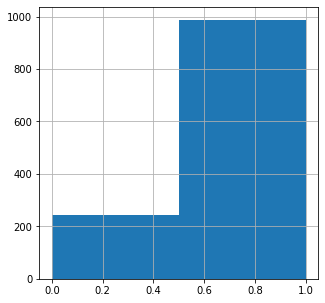

In [14]:
#hist of gender
print('      0 = Female        1 = Male')
Survey['Gender'].hist(bins = 2, figsize = (5,5))

     0-25,    25-35,     35-45,     45+


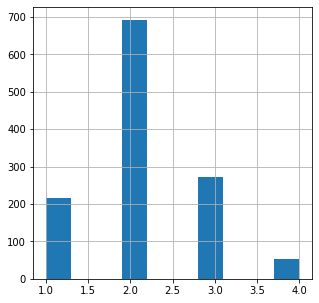

In [15]:
#hist age
print('     0-25,    25-35,     35-45,     45+')
Survey['Age'].hist(figsize=(5,5))

     No,          Don't know,      Yes


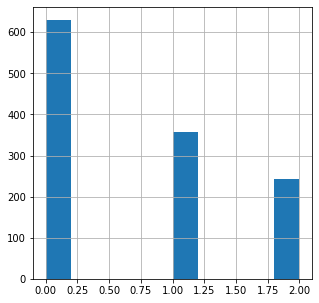

In [16]:
#hist seek help?
print("     No,          Don't know,      Yes")
Survey['seek_help'].hist(figsize=(5,5))

     No,          Not sure,        Yes


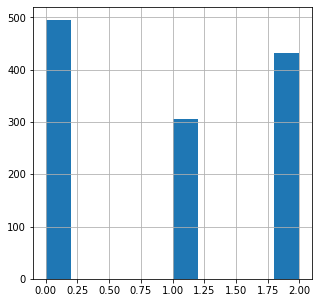

In [17]:
#Care options hist
print('     No,          Not sure,        Yes')
Survey['care_options'].hist(figsize=(5,5))

      No,         Don't know,      Yes


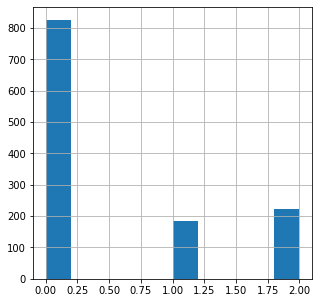

In [18]:
#wellness program hist
print("      No,         Don't know,      Yes")
Survey['wellness_program'].hist(figsize=(5,5))

In [19]:
#Split model into training and testing set
from sklearn import model_selection
from sklearn.model_selection import train_test_split

x = Survey.drop(['mental_health_consequence'],axis='columns')
y = Survey['mental_health_consequence']

X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,
                                                                test_size=0.2,
                                                                random_state=42)

In [20]:
#KNN classification method (tested many k, 19 has best score)
from sklearn import neighbors, datasets

k = 19
knn_class_model = neighbors.KNeighborsClassifier(k, weights='distance')
knn_class_model.fit(X_train,y_train)
score = knn_class_model.score(X_test,y_test)
trainscore = knn_class_model.score(X_train,y_train)
print('Test score with {} NNs : {}\nTrain score with {} NNs: {}'.format(k,score,k,trainscore))

Test score with 19 NNs : 0.6518218623481782
Train score with 19 NNs: 1.0


In [21]:
#Random Forest classification method (tested many n, 185 has best score)
from sklearn.ensemble import RandomForestClassifier

n = 185
rfc_class_model = RandomForestClassifier(n_estimators=n,random_state = 42)
rfc_class_model.fit(X_train,y_train)
score = rfc_class_model.score(X_test,y_test)
trainscore = rfc_class_model.score(X_train,y_train)
print('Test score with {} estimators : {}\nTrain score with {} estimators: {}'.format(n,score,n,trainscore))

Test score with 185 estimators : 0.7206477732793523
Train score with 185 estimators: 1.0


In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier

pagg_class_model = PassiveAggressiveClassifier(random_state=42)
pagg_class_model.fit(X_train,y_train)
score = pagg_class_model.score(X_test,y_test)
trainscore = pagg_class_model.score(X_train,y_train)
print('Test score : {}\nTrain score: {}'.format(score,trainscore))


Test score : 0.47368421052631576
Train score: 0.5451776649746193


In [23]:
#RMSE & confusion matrix & classification report for each method
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models = [knn_class_model,rfc_class_model,pagg_class_model]
name = {knn_class_model:'KNN',
        rfc_class_model:'Random Forest',
        pagg_class_model:'Pass Aggressive'}
RMSE = {}
confusion = {}
report = {}
errors = {}
for model in models:
    prediction = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, prediction))
    RMSE[name[model]] = rmse
    confusion[name[model]] = confusion_matrix(y_test, prediction)
    report[name[model]] = classification_report(y_test,prediction)
    
    error = []
    i = 0
    for y in y_test:
        err = abs(y-prediction[i])
        error.append(err)
        errors[name[model]] = error
        
for models in RMSE:
    print('{} has RMSE of {}.'.format(models,RMSE[models]))
    print('Confusion matrix:\n{}'.format(confusion[models]))
    print('Classification report:\n{}\n\n\n'.format(report[models]))

KNN has RMSE of 0.6488856845230502.
Confusion matrix:
[[81 18  2]
 [30 57  5]
 [ 4 27 23]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       101
         1.0       0.56      0.62      0.59        92
         2.0       0.77      0.43      0.55        54

    accuracy                           0.65       247
   macro avg       0.68      0.62      0.63       247
weighted avg       0.66      0.65      0.65       247




Random Forest has RMSE of 0.5726562866782.
Confusion matrix:
[[88 11  2]
 [23 62  7]
 [ 2 24 28]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82       101
         1.0       0.64      0.67      0.66        92
         2.0       0.76      0.52      0.62        54

    accuracy                           0.72       247
   macro avg       0.72      0.69      0.70       247
weighted avg       0.72      0.72      0.72       247



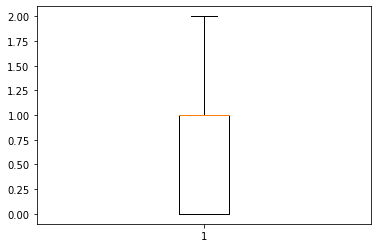

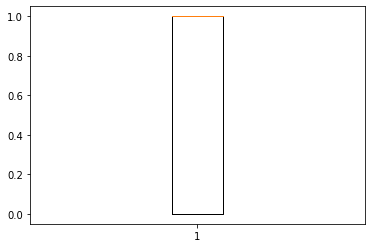

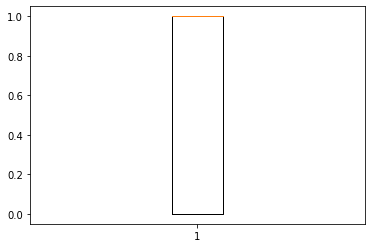

In [24]:
#boxplots of errors
from matplotlib.pyplot import boxplot

for model in errors:
    x = errors[model]
    boxplot(x)
    plt.show()